In [1]:
from __future__ import absolute_import,division,print_function
import tensorflow as tf

2024-05-11 13:40:43.797320: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-11 13:40:44.030151: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-11 13:40:44.030185: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-11 13:40:44.071552: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-11 13:40:44.156885: I tensorflow/core/platform/cpu_feature_guar

In [2]:
mnist=tf.keras.datasets.mnist

(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train,X_test=X_train/255,X_test/255

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
import tensorflow.keras.layers as layer

model = tf.keras.models.Sequential([
    layer.Flatten(input_shape=(28,28)),#Aplanado de tensores
    layer.Dense(128,activation='relu'),#Neuronas densas con activacion relu
    layer.Dropout(0.2),#Dropout para evitar el overfitting
    layer.Dense(10,activation='softmax')#1Q clases con activación softmax
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


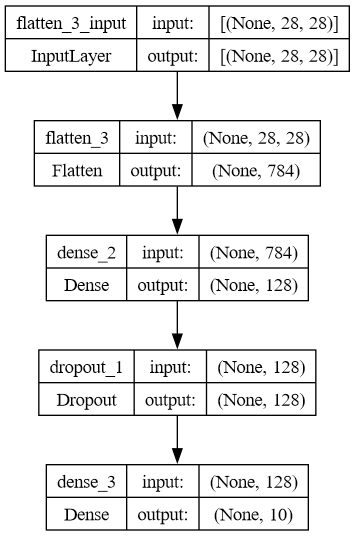

In [10]:
from tensorflow.keras.utils import plot_model
#plot_model(model,to_file='mnist_dense.png',show_shapes=True,show_dtype=False)

In [6]:
history=model.fit(X_train,y_train,epochs=5)

Epoch 1/5


2024-05-11 13:44:13.415258: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-11 13:44:13.939204: I external/local_xla/xla/service/service.cc:168] XLA service 0x7efcc214dfa0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-11 13:44:13.939230: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2024-05-11 13:44:13.950291: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-11 13:44:13.974535: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
I0000 00:00:1715456654.043526     860 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 6s 2ms/step - loss: 0.3004 - accuracy: 0.9135
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1483 - accuracy: 0.9555
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1097 - accuracy: 0.9671
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0882 - accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0760 - accuracy: 0.9755


In [19]:
model.evaluate(X_test,y_test,verbose=2)

313/313 - 1s - loss: 0.0744 - accuracy: 0.9783 - 691ms/epoch - 2ms/step


[0.07437914609909058, 0.9782999753952026]

In [20]:
import pandas as pd
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist

,loss,accuracy,epoch
0,0.300376,0.913450,0
1,0.148310,0.955500,1
2,0.109734,0.967133,2
3,0.088220,0.973217,3
4,0.075965,0.975483,4


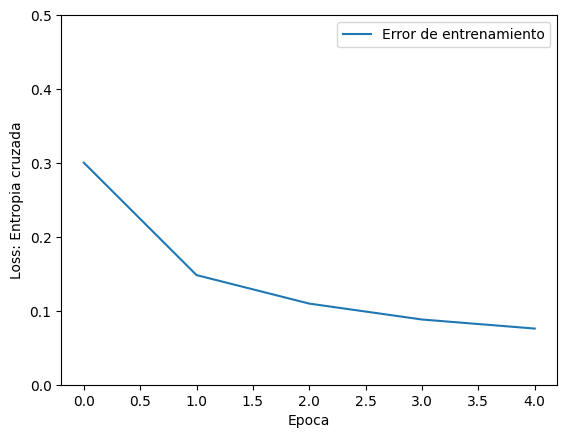

In [21]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel('Epoca')
plt.ylabel('Loss: Entropia cruzada')
plt.plot(hist['epoch'],hist['loss'],
         label="Error de entrenamiento")
plt.ylim([0,0.5])
plt.legend()
plt.show()

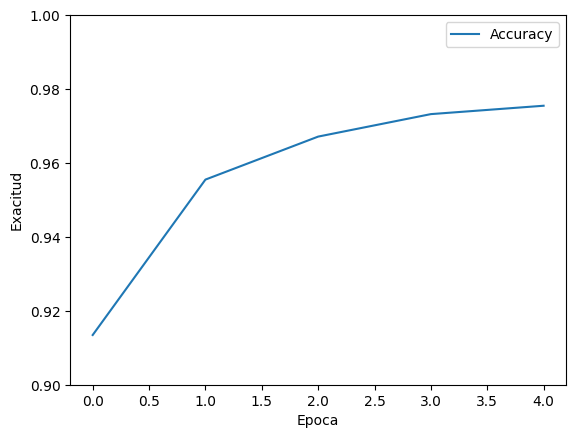

In [25]:
plt.figure()
plt.xlabel('Epoca')
plt.ylabel('Exacitud')
plt.plot(hist['epoch'],hist['accuracy'],
         label="Accuracy")
plt.ylim([0.9,1])
plt.legend()
plt.show()